<a href="https://colab.research.google.com/github/JustARandomNJ/AIMLProjs/blob/main/LRL/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [14]:
habits = pd.read_csv('student_habits_performance.csv')
habits.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [15]:
df = habits.drop(columns=["student_id"])
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [16]:

df['diet_quality'] = df['diet_quality'].map({'Poor': 0, 'Fair': 1, 'Good': 2})

In [17]:
df = pd.get_dummies(df, columns=['gender', 'part_time_job', 'internet_quality',
                                 'extracurricular_participation', 'parental_education_level'], drop_first=True)


In [19]:
print(df[['study_hours_per_day', 'exam_score']])


     study_hours_per_day  exam_score
0                    0.0        56.2
1                    6.9       100.0
2                    1.4        34.3
3                    1.0        26.8
4                    5.0        66.4
..                   ...         ...
995                  2.6        76.1
996                  2.9        65.9
997                  3.0        64.4
998                  5.4        69.7
999                  4.3        74.9

[1000 rows x 2 columns]


In [20]:
correlation = df['study_hours_per_day'].corr(df['exam_score'])
print("Correlation:", correlation)

Correlation: 0.825418509396044


In [23]:
x = df['study_hours_per_day'].values
y = df['exam_score'].values

x_mean = sum(x) / len(x)
y_mean = sum(y) / len(y)

num = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x)))
den = sum((x[i] - x_mean) ** 2 for i in range(len(x)))

m = num/den

b = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (b):", b)

Slope (m): 9.490250405896841
Intercept (b): 35.91016203402565


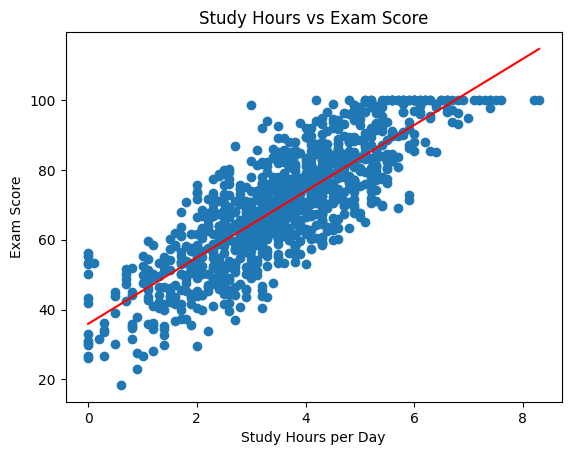

In [24]:


x_line = np.linspace(min(x), max(x), 100)
y_line = line = m * x_line + b

plt.plot(x_line, y_line, color='red', label = 'Regression Line')
plt.scatter(df['study_hours_per_day'], df['exam_score'])
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.show()